In [1]:
res = 48

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from floater.generators import FloatSet
from xmitgcm import open_mdsdataset

In [3]:
%matplotlib inline

In [4]:
ds = open_mdsdataset('/data/scratch/julius/KOCmaps/offline_velocities/grid_setup/GridSetup', iters=None)
ds

/home/cz2397/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


<xarray.Dataset>
Dimensions:  (XC: 3600, XG: 3600, YC: 1600, YG: 1600, Z: 1, Zl: 1, Zp1: 2, Zu: 1)
Coordinates:
  * XC       (XC) >f4 0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 ...
  * YC       (YC) >f4 -79.95 -79.85 -79.75 -79.65 -79.55 -79.45 -79.35 ...
  * XG       (XG) >f4 -2.77556e-17 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 ...
  * YG       (YG) >f4 -80.0 -79.9 -79.8 -79.7 -79.6 -79.5 -79.4 -79.3 -79.2 ...
  * Z        (Z) >f4 -50.0
  * Zp1      (Zp1) >f4 0.0 -100.0
  * Zu       (Zu) >f4 -100.0
  * Zl       (Zl) >f4 0.0
    rA       (YC, XC) >f4 2.15699e+07 2.15699e+07 2.15699e+07 2.15699e+07 ...
    dxG      (YG, XC) >f4 1930.58 1930.58 1930.58 1930.58 1930.58 1930.58 ...
    dyG      (YC, XG) >f4 11117.7 11117.7 11117.7 11117.7 11117.7 11117.7 ...
    Depth    (YC, XC) >f4 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    rAz      (YG, XG) >f4 2.14637e+07 2.14637e+07 2.14637e+07 2.14637e+07 ...
    dxC      (YC, XG) >f4 1940.13 1940.13 1940.13 1940.13 1940.13 1

In [5]:
lon = ds.XC.values
lat = ds.YC.values
land_mask = ds.hFacC.values==1

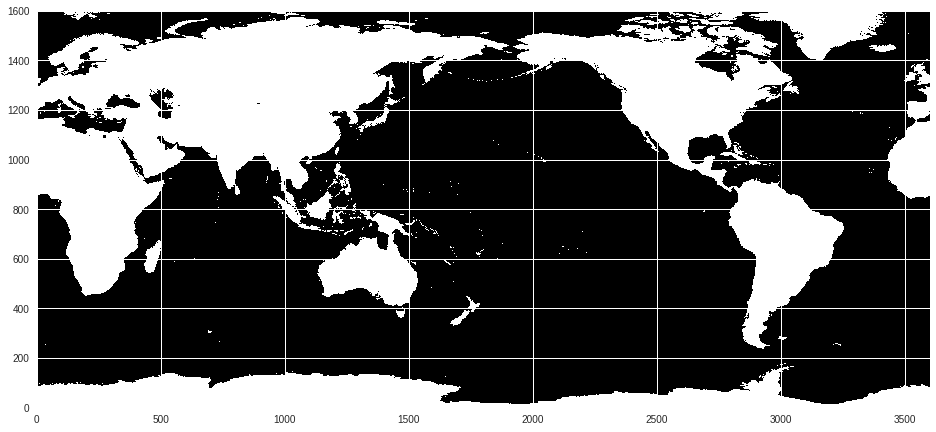

In [6]:
sns.set()
plt.rcParams['figure.figsize'] = (16, 8)
plt.imshow(land_mask, origin='bottom')
plt.show()

In [7]:
model_grid = {'lon': lon, 'lat': lat, 'land_mask': land_mask}

In [8]:
fs = FloatSet(xlim=(0, 360), ylim=(-80, 70), dx=1/res, dy=1/res, model_grid=model_grid)

In [9]:
fs.get_rectmesh()

(array([ 196.11458333,  196.13541667,  196.15625   , ...,  359.94791667,
         359.96875   ,  359.98958333]),
 array([-78.48958333, -78.48958333, -78.48958333, ...,  69.98958333,
         69.98958333,  69.98958333]))

In [10]:
path = '/data/scratch/cz2397/rclv-eddies/flt_ini_pos_rec.global.' + str(res) + 'deg_f4'

In [11]:
pkl_path = path + '.pkl'

In [12]:
fs.to_pickle(pkl_path)

In [13]:
fs_test = FloatSet(load_path=pkl_path)

In [14]:
fs_test.ocean_bools

array([False, False, False, ...,  True,  True,  True], dtype=bool)

In [15]:
bin_path = path + '.bin'

In [16]:
fs.to_mitgcm_format(bin_path, mesh='rect', read_binary_prec=32)

In [17]:
floats = np.fromfile(bin_path, dtype='>f4')

In [18]:
total_num = len(floats)
total_num

756097767

In [19]:
float_num = total_num//9
float_num

84010863

In [20]:
floats.shape = (float_num, 9)
floats.shape

(84010863, 9)

In [21]:
x = floats[:, 2]
y = floats[:, 3]

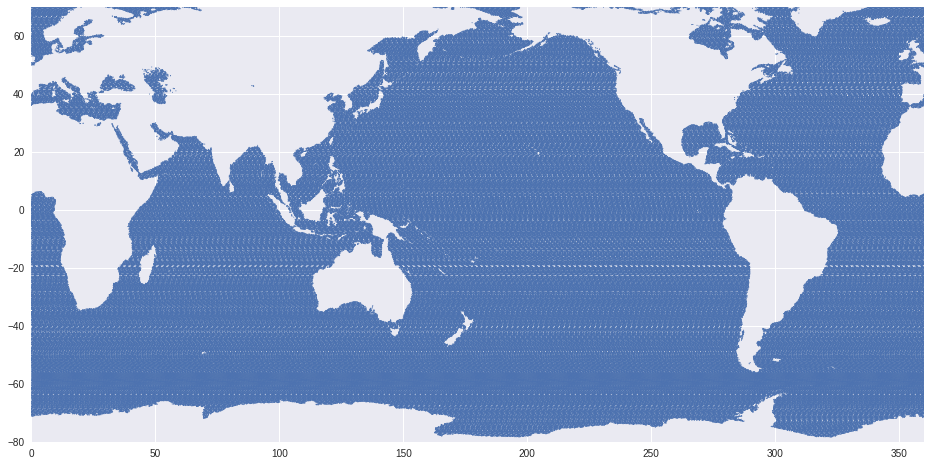

In [22]:
sns.set()
plt.rcParams['figure.figsize'] = (16, 8)
plt.scatter(x[::100], y[::100], edgecolor='none', s=1)
plt.xlim([0, 360])
plt.ylim([-80, 70])
plt.show()